In [67]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [68]:
FNs = glob.glob('slurm*.out')

In [69]:
# # first get lines where sections start
# for aFN in FNs[0:1]:
#     with open(aFN,'r') as f:
#         for idx, line in enumerate(f):
#             print(line)
#             if idx == 20:
#                 break
#     break

In [70]:
# first get lines where sections start
results = []
for idxjob, aFN in enumerate(FNs):
    with open(aFN,'r') as f:
        for idx, line in enumerate(f):
            if 'The name of the set is' in line:
                results_tmp = []
                GOID = line.strip().split()[-1]
                results_tmp.append(GOID)
            if ('BioGRID' in line) or ('STRING' in line) or ('STRING-EXP' in line) or ('GIANT-TN' in line):
                line_tmp = line.strip().split()
                network = line_tmp[0]
                feature = line_tmp[1]
                results_tmp.append(network+'-'+feature)
                GSC = line_tmp[2]
                results_tmp.append(GSC)
            if 'up to the SL' in line:
                time1 = float(line.strip().split()[-1])
                results_tmp.append(time1)
            if 'to do the SL' in line:
                time2 = float(line.strip().split()[-1])
                results_tmp.append(time2)
            if 'generate the main' in line:
                time3 = float(line.strip().split()[-1])
                results_tmp.append(time3)
            if 'small network' in line:
                time4 = float(line.strip().split()[-1])
                results_tmp.append(time4)
            if 'maxresident' in line:
                mem = float(line.strip().split()[-1].split('max')[0])/1000000
                results_tmp.append(mem)
                results_tmp.append(idxjob)
                results.append(results_tmp)
col_names = ['ID','NetworkFeature','GSC','IDConvert','SL','MakeDFs','MakeNetwork','MaxGB','JobNum']
df = pd.DataFrame(results,columns=col_names)
df.head()

,ID,NetworkFeature,GSC,IDConvert,SL,MakeDFs,MakeNetwork,MaxGB,JobNum
0,GO:0010745,BioGRID-Embedding,GO,0.835438,1.711411,1.641093,1.166330,0.408652,0
1,GO:0007566,BioGRID-Embedding,GO,0.660817,2.010630,1.703353,1.104861,0.412744,0
2,GO:0001764,BioGRID-Embedding,GO,0.663554,2.015139,1.774234,1.064972,0.408656,0
3,GO:0010745,BioGRID-Adjacency,GO,0.745102,58.656884,2.691970,1.087974,7.042236,0
4,GO:0007566,BioGRID-Adjacency,GO,0.766611,82.588750,2.908394,0.939961,7.042348,0


## The plot below shows that for everything it only takes a few seconds to get dat ready to go into SL. This part might be much slower on the cloud though. Time is in seconds.

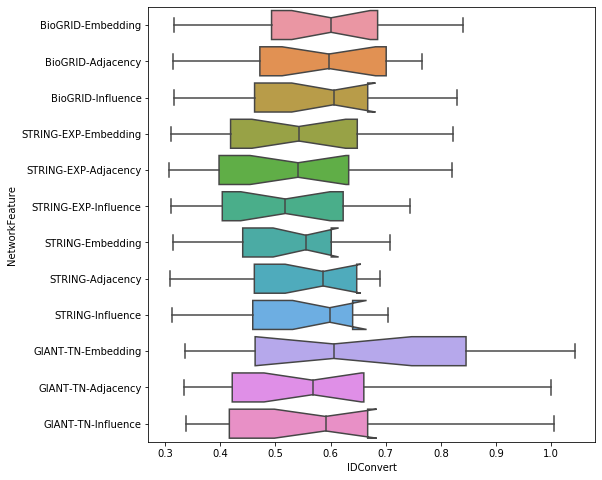

In [71]:
fig, ax = plt.subplots(figsize=(8,8))
g = sns.boxplot(data=df,y='NetworkFeature',x='IDConvert',ax=ax,showfliers=False,notch=True)

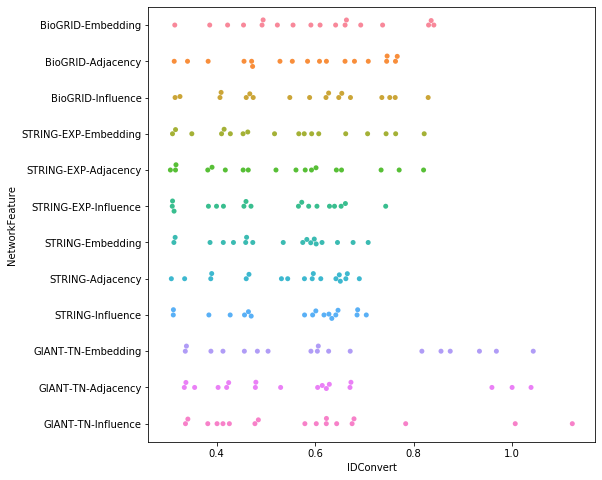

In [72]:
fig, ax = plt.subplots(figsize=(8,8))
g = sns.swarmplot(data=df,y='NetworkFeature',x='IDConvert',ax=ax)

## This plot shows the time it takes to do the SL part. Time is in seconds.

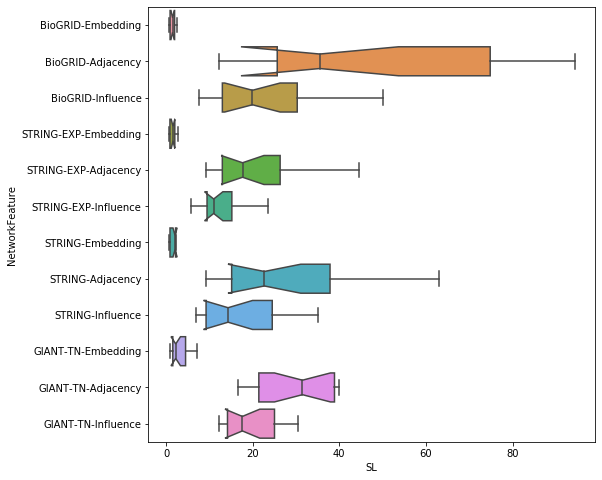

In [73]:
fig, ax = plt.subplots(figsize=(8,8))
g = sns.boxplot(data=df,y='NetworkFeature',x='SL',ax=ax,notch=True,showfliers=False)

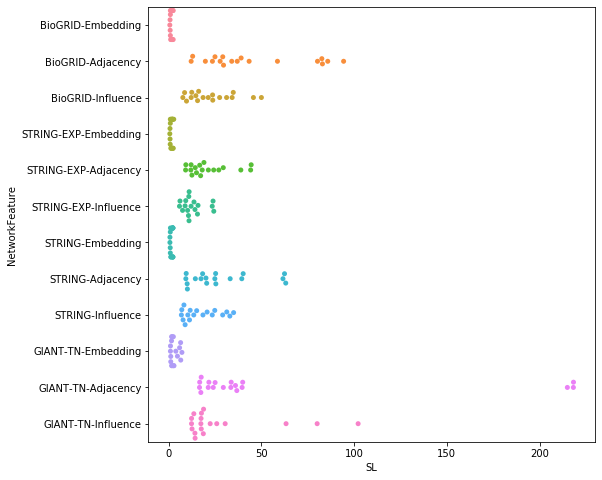

In [74]:
fig, ax = plt.subplots(figsize=(8,8))
g = sns.swarmplot(data=df,y='NetworkFeature',x='SL',ax=ax)

## This plot shows how long it takes to make the main output dataframes. Time is in seconds.

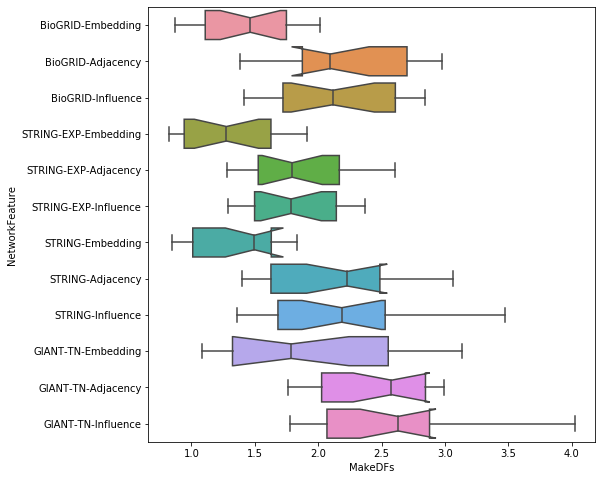

In [75]:
fig, ax = plt.subplots(figsize=(8,8))
g = sns.boxplot(data=df,y='NetworkFeature',x='MakeDFs',ax=ax,notch=True,showfliers=False)

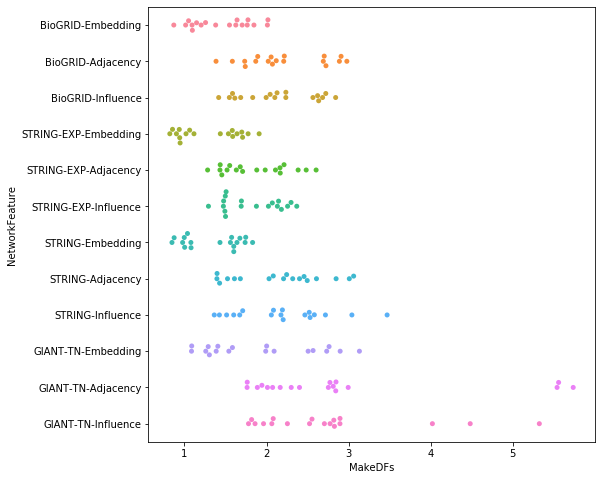

In [76]:
fig, ax = plt.subplots(figsize=(8,8))
g = sns.swarmplot(data=df,y='NetworkFeature',x='MakeDFs',ax=ax)

## This plot shows how long it takes to make the network with nodes for genes in the top 1000 predictions. Time is in seconds.

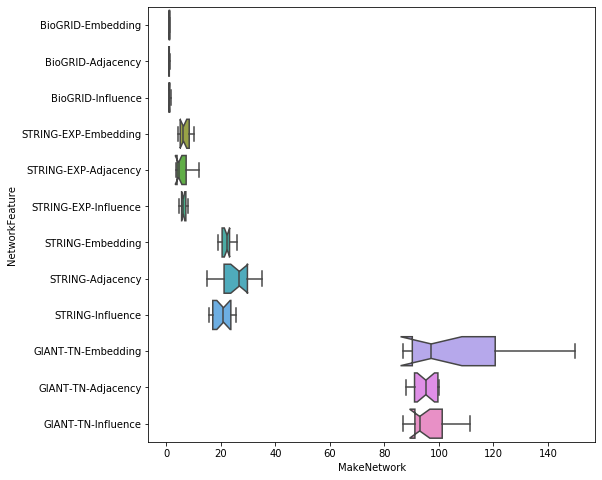

In [77]:
fig, ax = plt.subplots(figsize=(8,8))
g = sns.boxplot(data=df,y='NetworkFeature',x='MakeNetwork',ax=ax,notch=True,showfliers=False)

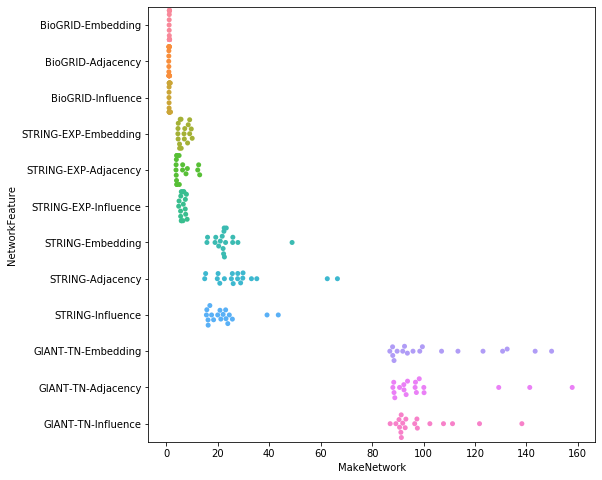

In [78]:
fig, ax = plt.subplots(figsize=(8,8))
g = sns.swarmplot(data=df,y='NetworkFeature',x='MakeNetwork',ax=ax)

## This shos the max resident size. I think it is in GBs

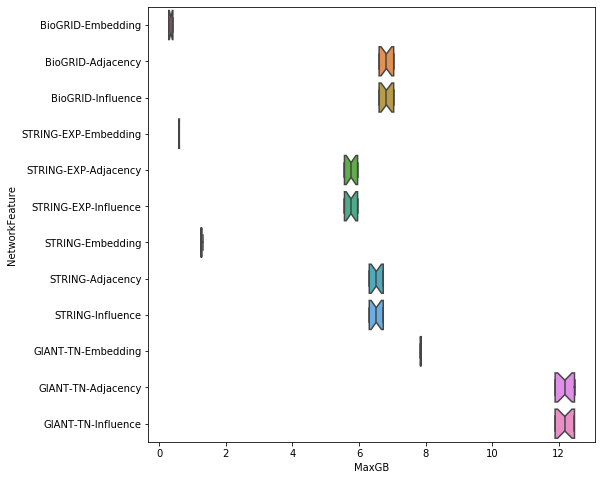

In [79]:
fig, ax = plt.subplots(figsize=(8,8))
g = sns.boxplot(data=df,y='NetworkFeature',x='MaxGB',ax=ax,notch=True,showfliers=False)

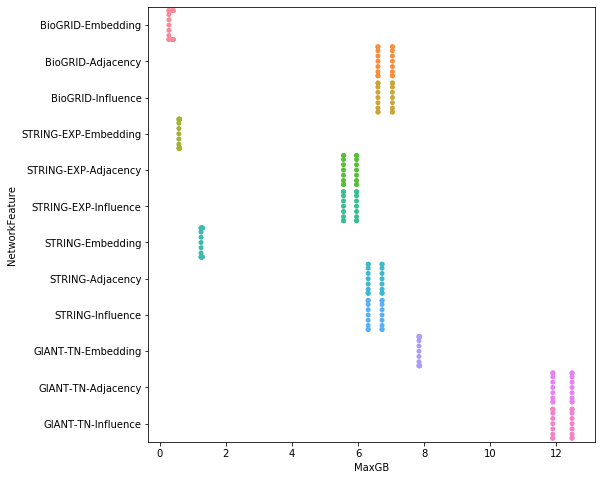

In [80]:
fig, ax = plt.subplots(figsize=(8,8))
g = sns.swarmplot(data=df,y='NetworkFeature',x='MaxGB',ax=ax)